## Téléchargement datas

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
chemin='//content//drive//MyDrive//Projet 11//datas//'

Mounted at /content/drive/


In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datas=pd.read_csv(chemin+"dataset.csv")
datas.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2018,Croissance_Population_2000_2018_%,Organic producers_2018,Organic retail sales [Million €]_2018,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,indice_logistique_2018,Population_urbaine_%_2018,Ease of Doing Business Score_2018,RNB par habitant_(PPA)_2018
0,Afghanistan,28.0,29.0,49.122807,50.877193,37171.921,78.88,10.0,0.0,-1.502876,-2.753441,1.95,25.495,44.2,2460.0
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,57792.518,28.52,237.0,0.0,-0.136797,-0.237547,3.38,66.355,66.7,12970.0
2,Albanie,13.0,38.0,27.659574,80.851064,2882.740,-7.88,82.0,0.0,-0.546019,0.366779,2.66,60.319,67.0,13680.0
3,Algérie,275.0,2.0,99.277978,0.722022,42228.408,36.04,64.0,0.0,-0.658904,-0.842108,2.45,72.629,48.5,13430.0
4,Allemagne,1514.0,842.0,87.061530,48.418631,83124.418,2.12,31713.0,10910.0,1.898399,0.577865,4.20,77.312,79.3,57060.0


## II) ACP et Clustering avec outliers

#### A) ACP

In [4]:
X = datas.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

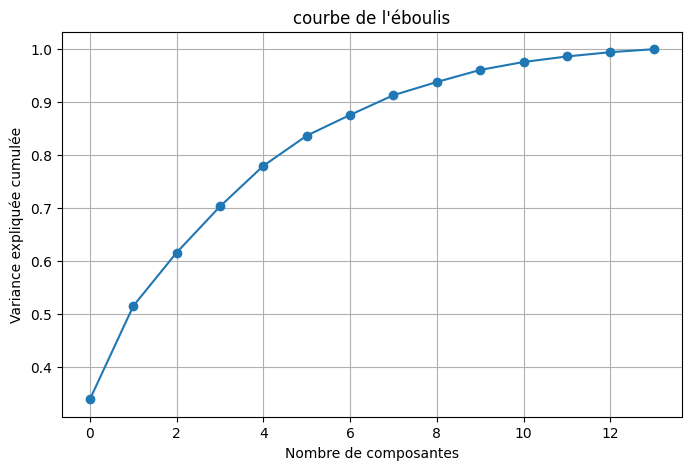

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title("courbe de l'éboulis")
plt.grid(True)
plt.show()

In [7]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

# DataFrame final avec les composantes principales
df_pca = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(n_components)])


In [8]:
import plotly.express as px

# Supposons que tu as déjà ça :
# - X_scaled : tes données standardisées
# - pca : l'objet PCA avec 2 composantes
# - main_df["Zone"] : la colonne qui contient le nom du pays ou de la zone

# On relance l’ACP avec 2 composantes (si ce n’est pas déjà fait)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame avec les deux composantes et la zone
df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["Zone"] = datas["Zone"].values


In [9]:


import plotly.express as px

# Liste des zones à étiqueter (par exemple : quelques pays représentatifs)
zones_a_labeliser = ["Allemagne", "Brésil", "Inde", "Nigéria", "États-Unis d'Amérique","Chine, continentale"]

# Ajout d'une nouvelle colonne pour distinguer les points à surligner
df_plot["Label"] = df_plot["Zone"].apply(lambda z: z if z in zones_a_labeliser else "")

# Ajout d'une autre colonne pour la couleur : tous en gris sauf les zones sélectionnées
df_plot["Couleur"] = df_plot["Zone"].apply(lambda z: "Sélectionné" if z in zones_a_labeliser else "Autres")

# Création du graphique
fig = px.scatter(
    df_plot,
    x="PC1",
    y="PC2",
    color="Couleur",
    hover_name="Zone",  # Montre tous les noms au survol
    text="Label",       # Affiche seulement quelques labels (définis ci-dessus)
    title="Projection des pays sur les deux premières composantes de l'ACP",
    width=1000,         # Plus large
    height=700          # Plus haut
)

# Personnalisation des points
fig.update_traces(
    marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),
    textposition="top center",  # Position du texte au-dessus du point
    selector=dict(mode='markers+text')  # Appliquer aux traces avec texte
)

# Optionnel : personnalisation du layout
fig.update_layout(
    title_font_size=20,
    legend_title_text="Groupes",
    font=dict(size=14)
)

fig.show()



In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# On suppose que tu as déjà un DataFrame `X` contenant les variables numériques
# Et que tu as fait :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Loadings = poids des variables sur chaque composante
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# DataFrame des vecteurs
df_vectors = pd.DataFrame(loadings, columns=["PC1", "PC2"])
df_vectors["Variable"] = X.columns


In [11]:
# Liste des variables que tu veux étiqueter
variables_a_labeliser = [
    "Production",
    "Organic retail sales [Million €]_2018",
    "Control of Corruption: Estimate",
    "Croissance_population_2000_2018_%",
    "RNB par habitant_(PPA)_2018"
]

# Création d'une nouvelle colonne "Label" pour les noms visibles uniquement pour certaines variables
df_vectors["Label"] = df_vectors["Variable"].apply(lambda x: x if x in variables_a_labeliser else "")

# Création du scatter plot
fig = px.scatter(
    df_vectors,
    x="PC1",
    y="PC2",
    text="Label",              # N'affiche que les noms choisis
    hover_name="Variable",     # Info au survol pour toutes les variables
    title="Cercle des corrélations",
    width=700,
    height=700
)

# Mise à l’échelle du cercle
fig.update_xaxes(range=[-1.1, 1.1], zeroline=True)
fig.update_yaxes(range=[-1.1, 1.1], zeroline=True)

# Cercle de rayon 1
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

fig.add_scatter(
    x=circle_x,
    y=circle_y,
    mode='lines',
    name='Cercle unité',
    line=dict(color='gray', dash='dash')
)

# Lignes X et Y (axes)
fig.add_shape(type="line", x0=-1.1, y0=0, x1=1.1, y1=0, line=dict(color="gray", width=1))
fig.add_shape(type="line", x0=0, y0=-1.1, x1=0, y1=1.1, line=dict(color="gray", width=1))

# Aspect visuel
fig.update_layout(showlegend=False)
fig.update_traces(marker=dict(size=8, color='blue'), textposition='top center')
fig.update_layout(yaxis_scaleanchor="x", yaxis_scaleratio=1)

fig.show()

In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go





# Liste des variables que tu veux étiqueter visuellement
variables_a_labeliser = [
    "Production",
    "Organic retail sales [Million €]_2018",
    "Control of Corruption: Estimate",
    "Croissance_population_2000_2018_%",
    "Dépendance_import(%)",
    "Pop_2018",
    "RNB par habitant_(PPA)_2018",


]

# Création du cercle unité
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

# Création de la figure
fig = go.Figure()

# Ajout du cercle unité
fig.add_trace(go.Scatter(
    x=circle_x,
    y=circle_y,
    mode='lines',
    line=dict(color='lightgray', dash='dash'),
    showlegend=False,
    hoverinfo='skip'
))

# Ajout des axes X et Y
fig.add_shape(type="line", x0=-1.1, y0=0, x1=1.1, y1=0, line=dict(color="gray", width=1))
fig.add_shape(type="line", x0=0, y0=-1.1, x1=0, y1=1.1, line=dict(color="gray", width=1))

# Ajout des flèches (lignes avec survol) + annotations
for _, row in df_vectors.iterrows():
    # Ajout de la ligne/flèche avec hover
    fig.add_trace(go.Scatter(
        x=[0, row['PC1']],
        y=[0, row['PC2']],
        mode='lines+markers',
        line=dict(color='blue', width=2),
        marker=dict(size=1, color='blue'),
        name=row['Variable'],
        hovertemplate=f"<b>{row['Variable']}</b><br>PC1: {row['PC1']:.2f}<br>PC2: {row['PC2']:.2f}<extra></extra>",
        showlegend=False
    ))

    # Ajout du nom de la variable (visuel) si elle est dans la liste
    if row["Variable"] in variables_a_labeliser:
        fig.add_annotation(
            x=row["PC1"],
            y=row["PC2"],
            text=row["Variable"],
            showarrow=False,
            font=dict(size=12, color="black"),
            xanchor="left",
            yanchor="middle"
        )

# Mise à l’échelle et style
fig.update_xaxes(range=[-1.1, 1.1], zeroline=True)
fig.update_yaxes(range=[-1.1, 1.1], zeroline=True)

fig.update_layout(
    title="Cercle des corrélations (ACP)",
    width=700,
    height=700,
    yaxis_scaleanchor="x",
    yaxis_scaleratio=1,
    plot_bgcolor="white"
)

fig.show()


In [13]:
from IPython.display import display
import pandas as pd

# Création du tableau
results_table = df_vectors.copy()
results_table["Cos²"] = results_table["PC1"] ** 2 + results_table["PC2"] ** 2
results_table = results_table[["Variable", "PC1", "PC2", "Cos²"]].round(3)

# Affichage stylisé
def stylize_table(df):
    return df.style.format({
        "PC1": "{:.3f}",
        "PC2": "{:.3f}",
        "Cos²": "{:.1%}"  # Conversion en pourcentage
    }).background_gradient(
        subset=["PC1", "PC2", "Cos²"], cmap="Blues"
    ).set_caption(
        "Coordonnées des variables sur les axes principaux"
    ).set_table_styles([{
        "selector": "caption",
        "props": [("font-size", "16px"), ("font-weight", "bold"), ("color", "#1f77b4")]
    }])

display(stylize_table(results_table))

,Variable,PC1,PC2,Cos²
0,Production,0.327,0.757,68.0%
1,Importations - Quantité,0.437,0.125,20.6%
2,Autosuffisance(%),0.344,0.326,22.4%
3,Dépendance_import(%),0.048,-0.507,25.9%
4,Pop_2018,0.087,0.829,69.5%
5,Croissance_Population_2000_2018_%,-0.431,-0.030,18.7%
6,Organic producers_2018,-0.057,0.543,29.8%
7,Organic retail sales [Million €]_2018,0.408,0.502,41.9%
8,Control of Corruption: Estimate,0.857,-0.251,79.7%
9,Political Stability and Absence of Violence/Terrorism: Estimate,0.665,-0.434,63.0%


#### B) Clustering

On voit que si je fais un clustering sans ACP il n'y a qu'un seul groupe, le coude est situé au premier groupe.

##### a) Classification hiérarchique

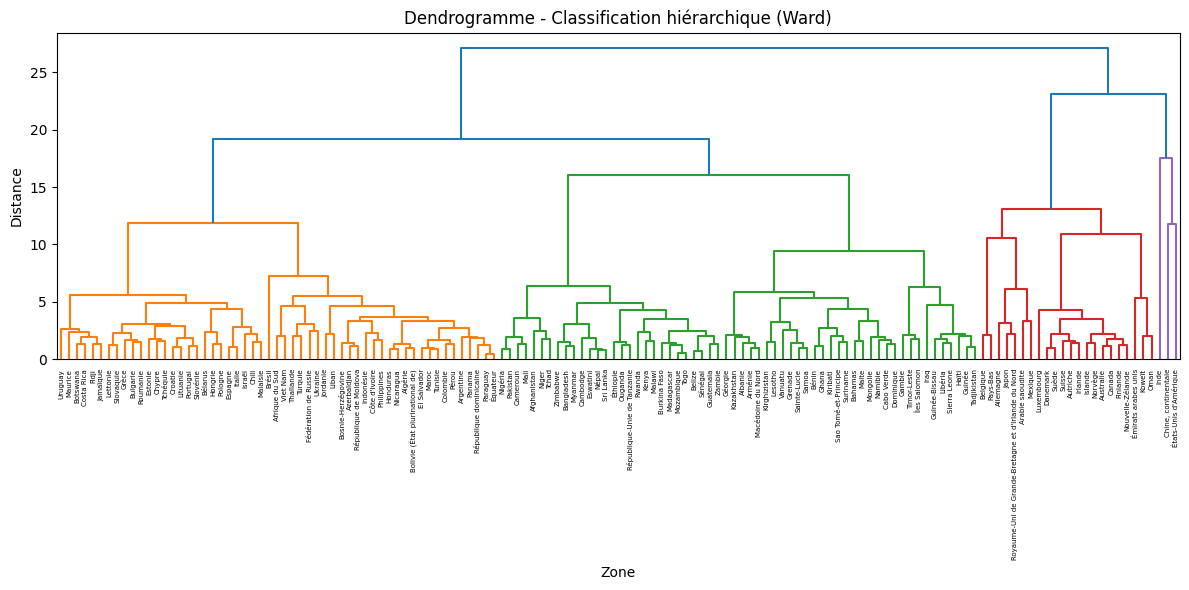

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

linked = linkage(X_scaled, method='ward')

# Dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=datas['Zone'].values, leaf_rotation=90)
plt.title('Dendrogramme - Classification hiérarchique (Ward)')
plt.xlabel('Zone')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [15]:
# Choix du nombre de cluster
n_clusters = 6
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

datas_tem = datas.copy()
datas_tem['PCA1'] = X_scaled[:, 0]
datas_tem['PCA2'] = X_scaled[:, 1]
datas_tem['cluster_hier'] = cluster_labels

In [16]:
import plotly.express as px

fig = px.scatter(
    datas_tem,
    x='PCA1',
    y='PCA2',
    color=datas_tem['cluster_hier'].astype(str),
    hover_name='Zone',
    title='Classification Hiérarchique après ACP',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(width=800, height=600)
fig.show()


###### b) Clustering K-means

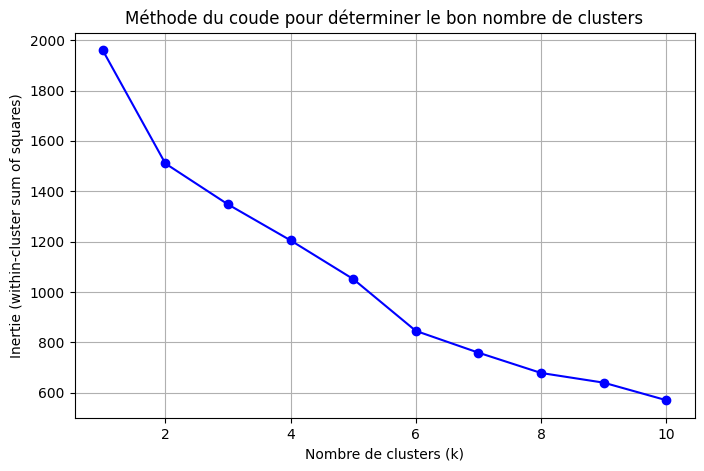

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # On applique sur les 2 premières composantes
    inertias.append(kmeans.inertia_)

# Affichage du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (within-cluster sum of squares)')
plt.title("Méthode du coude pour déterminer le bon nombre de clusters")
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)

datas_tem=datas.copy()

# 3. Ajouter les infos au DataFrame `datas`
datas_tem['PCA1'] = X_pca[:, 0]
datas_tem['PCA2'] = X_pca[:, 1]
datas_tem['cluster'] = labels


fig = px.scatter(
    datas_tem,
    x='PCA1',
    y='PCA2',
    color='cluster',
    hover_name='Zone',  # Nom de la zone au survol
    title='Clustering KMeans après ACP (2 composantes)',
    color_continuous_scale=px.colors.qualitative.Dark24
)

fig.update_layout(width=800, height=600)
fig.show()


## III) ACP et Clustering sans outliers

#### A) Clean outliers

In [19]:
def mahalanobis_distance(x, data, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal() if hasattr(mahal, 'diagonal') else mahal


In [20]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def mahalanobis_distance(x, data, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal() if hasattr(mahal, 'diagonal') else mahal



In [21]:
distances = mahalanobis_distance(X.values, X.values)
datas['mahalanobis'] = distances

In [22]:
threshold = chi2.ppf(0.99, datas.shape[1] - 1)

# Marquer les outliers
datas['is_outlier'] = datas['mahalanobis'] > threshold

#### B) ACP

In [23]:
datas_without_outliers = datas[datas["is_outlier"] == False]
datas_without_outliers=datas_without_outliers.drop(columns=["mahalanobis","is_outlier"])

In [24]:
datas_without_outliers.shape[0]

130

In [25]:
X = datas_without_outliers.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

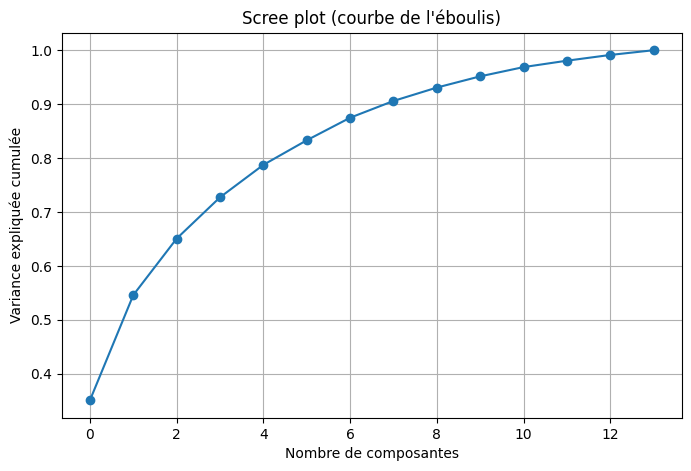

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title("Scree plot (courbe de l'éboulis)")
plt.grid(True)
plt.show()

In [28]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["Zone"] = datas_without_outliers["Zone"].values

fig = px.scatter(
    df_plot,
    x="PC1",
    y="PC2",
    color_discrete_sequence=["#1f77b4"],
    hover_name="Zone",
    title="Projection des pays sur les deux premières composantes de l'ACP",
    width=800,
    height=600
)

pays_a_annoter = ["Maroc", "Bangladesh", "Espagne", "Niger", "Brésil","Fédération de Russie","Danemark","Malte"]

for i, row in df_plot.iterrows():
    if row["Zone"] in pays_a_annoter:
        fig.add_annotation(
            x=row["PC1"],
            y=row["PC2"],
            text=row["Zone"],
            showarrow=True,
            arrowhead=1,
            font=dict(size=12, color="black")
        )

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))

fig.show()



In [29]:
import plotly.graph_objects as go

variables_a_labeliser = [
    "Production",
    "Organic retail sales [Million €]_2018",
    "Control of Corruption: Estimate",
    "Croissance_Population_2000_2018_%",
    "Organic producers_2018",
    "Dépendance_import(%)",
    "Autosuffisance(%)",
    "Pop_2018",


]

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
df_vectors = pd.DataFrame(loadings, columns=["PC1", "PC2"])
df_vectors["Variable"] = X.columns

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_vectors["PC1"],
    y=df_vectors["PC2"],
    mode='markers',
    marker=dict(size=8, color='blue'),
    text=df_vectors["Variable"],
    hoverinfo='text'
))

for i, row in df_vectors.iterrows():
    if row["Variable"] in variables_a_labeliser:
        fig.add_annotation(
            x=row["PC1"],
            y=row["PC2"],
            text=row["Variable"],
            showarrow=True,
            arrowhead=1,
            font=dict(size=11, color="black")
        )

theta = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

fig.add_trace(go.Scatter(
    x=circle_x,
    y=circle_y,
    mode='lines',
    name='Cercle unité',
    line=dict(color='gray', dash='dash')
))


fig.add_shape(type="line", x0=-1.1, y0=0, x1=1.1, y1=0, line=dict(color="gray", width=1))
fig.add_shape(type="line", x0=0, y0=-1.1, x1=0, y1=1.1, line=dict(color="gray", width=1))

fig.update_layout(
    title="Cercle des corrélations",
    xaxis=dict(range=[-1.1, 1.1], zeroline=False),
    yaxis=dict(range=[-1.1, 1.1], zeroline=False, scaleanchor="x", scaleratio=1),
    width=700,
    height=700,
    showlegend=False
)

fig.show()


In [30]:
results_table = df_vectors.copy()
results_table["Cos²"] = results_table["PC1"] ** 2 + results_table["PC2"] ** 2
results_table = results_table[["Variable", "PC1", "PC2", "Cos²"]].round(3)

display(stylize_table(results_table))

,Variable,PC1,PC2,Cos²
0,Production,0.293,-0.713,59.4%
1,Importations - Quantité,0.306,-0.174,12.4%
2,Autosuffisance(%),0.267,-0.699,56.0%
3,Dépendance_import(%),-0.072,0.777,60.9%
4,Pop_2018,-0.121,-0.749,57.5%
5,Croissance_Population_2000_2018_%,-0.555,-0.003,30.8%
6,Organic producers_2018,-0.125,-0.410,18.3%
7,Organic retail sales [Million €]_2018,0.614,-0.132,39.5%
8,Control of Corruption: Estimate,0.857,0.253,79.8%
9,Political Stability and Absence of Violence/Terrorism: Estimate,0.673,0.525,72.8%


#### C) Clustering

##### a) Classification hiérarchique

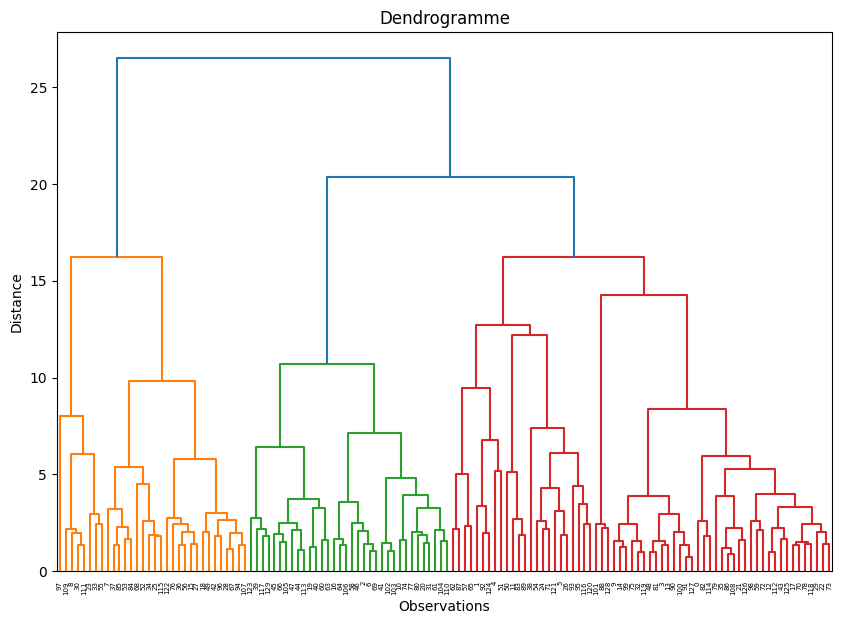

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogramme')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()


In [32]:
from sklearn.metrics import silhouette_score

for k in range(2, 30):
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Nombre de clusters : {k} → Silhouette Score : {score:.3f}")

Nombre de clusters : 2 → Silhouette Score : 0.204
Nombre de clusters : 3 → Silhouette Score : 0.155
Nombre de clusters : 4 → Silhouette Score : 0.169
Nombre de clusters : 5 → Silhouette Score : 0.176
Nombre de clusters : 6 → Silhouette Score : 0.189
Nombre de clusters : 7 → Silhouette Score : 0.203
Nombre de clusters : 8 → Silhouette Score : 0.222
Nombre de clusters : 9 → Silhouette Score : 0.204
Nombre de clusters : 10 → Silhouette Score : 0.187
Nombre de clusters : 11 → Silhouette Score : 0.200
Nombre de clusters : 12 → Silhouette Score : 0.161
Nombre de clusters : 13 → Silhouette Score : 0.164
Nombre de clusters : 14 → Silhouette Score : 0.167
Nombre de clusters : 15 → Silhouette Score : 0.171
Nombre de clusters : 16 → Silhouette Score : 0.178
Nombre de clusters : 17 → Silhouette Score : 0.185
Nombre de clusters : 18 → Silhouette Score : 0.190
Nombre de clusters : 19 → Silhouette Score : 0.191
Nombre de clusters : 20 → Silhouette Score : 0.194
Nombre de clusters : 21 → Silhouette Sc

In [33]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

# Copie du DataFrame
datas_temp = df_plot.copy()

# Clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=6)
labels = clustering.fit_predict(X_scaled)

# Ajout des labels au DataFrame
datas_temp['cluster_hc'] = labels

# Liste des pays à annoter
pays_a_annoter = [
    "Suède", "Canada", "Suisse", "Cameroun", "Tchad", "Pakistan",
    "Turquie", "Indonésie", "Maroc", "Colombie", "Mongolie",
    "Gambie", "Malte", "Bulgarie", "Libéria", "Ghana", "Irlande",
    "Italie", "Ouganda", "Ethopie", "Iraq"
]

# Graphique en fond blanc + couleurs personnalisées
fig_hc = px.scatter(
    datas_temp,
    x='PC1',
    y='PC2',
    color='cluster_hc',
    hover_name='Zone',
    title='Clustering Hiérarchique',
    color_discrete_sequence=['#7B68EE', '#FF6347', '#00FA9A', '#FFD700', '#DC143C', '#4682B4'],
    opacity=0.9,
    template='plotly_white'
)

# Ajout des annotations avec flèches noires et fond clair
for pays in pays_a_annoter:
    if pays in datas_temp['Zone'].values:
        coord = datas_temp[datas_temp['Zone'] == pays].iloc[0]
        fig_hc.add_annotation(
            x=coord['PC1'],
            y=coord['PC2'],
            text=pays,
            showarrow=True,
            arrowhead=2,
            font=dict(color='black', size=11, family="Arial"),
            arrowcolor='rgba(0,0,0,0.7)',
            ax=25,
            ay=-30,
            bordercolor='rgba(200,200,200,0.7)',
            bgcolor='rgba(240,240,240,0.8)',
            standoff=10
        )

# Mise à jour du layout pour fond clair et texte noir
fig_hc.update_layout(
    width=1100,
    height=850,
    showlegend=False,
    xaxis_title='<b>Développement économique et gouvernance (PCA1)</b>',
    yaxis_title='<b>Dépendance alimentaire vs. Autosuffisance (PCA2)</b>',
    font=dict(color='black', size=12),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)',
    xaxis=dict(gridcolor='rgba(200,200,200,0.5)'),
    yaxis=dict(gridcolor='rgba(200,200,200,0.5)'),
)

# Mise à jour des marqueurs pour fond clair
fig_hc.update_traces(
    marker=dict(
        line=dict(width=1.2, color='black'),
        size=11,
        opacity=0.92
    )
)

# Affichage du graphique
fig_hc.show()



In [34]:
nombre_pays_par_groupe = datas_temp['cluster_hc'].value_counts().sort_index()
print(nombre_pays_par_groupe)

cluster_hc
0    24
1    24
2    34
3    37
4     8
5     3
Name: count, dtype: int64


##### b) Clustering K-means

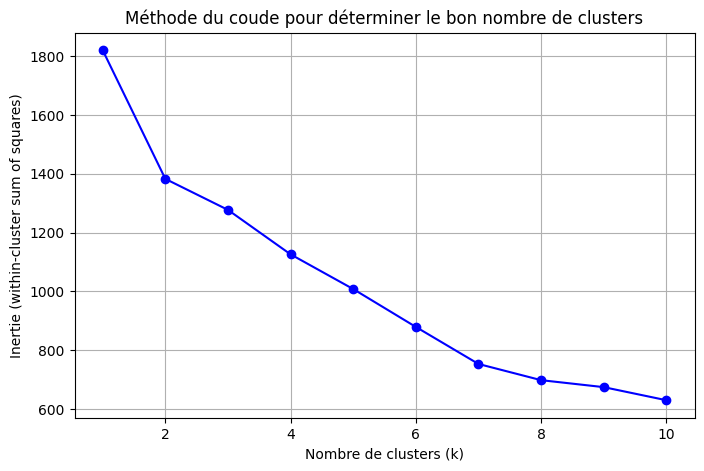

In [35]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Affichage du coude
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (within-cluster sum of squares)')
plt.title("Méthode du coude pour déterminer le bon nombre de clusters")
plt.grid(True)
plt.show()

In [36]:
from sklearn.cluster import KMeans
import plotly.express as px

# Étape 1 : Application du K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)  # Assurez-vous que 'X_scaled' est bien défini

# Étape 2 : Ajout des résultats au DataFrame (en tant que chaînes de caractères pour forcer l'affichage des étiquettes)
datas_temp['cluster_kmeans'] = labels_kmeans.astype(str)  # Convertir en string pour une légende discrète

# Étape 3 : Visualisation avec Plotly
fig_kmeans = px.scatter(
    datas_temp,
    x='PC1',
    y='PC2',
    color='cluster_kmeans',  # Utilisation des numéros de clusters comme étiquettes
    hover_name='Zone',
    title='Clustering K-Means (k=4)',
    color_discrete_sequence=['#FFD700', '#FF6347', '#7B68EE', '#00FA9A'],
    opacity=0.9,
    template='plotly_white',
    labels={'cluster_kmeans': 'Cluster'},  # Personnalisation du titre de la légende
    category_orders={'cluster_kmeans': ['0', '1', '2', '3']}  # Ordonner les clusters
)

# Étape 4 : Personnalisation avancée du layout
fig_kmeans.update_layout(
    width=1000,
    height=800,
    xaxis_title='Développement économique et gouvernance',
    yaxis_title='Dépendance alimentaire vs. Autosuffisance',
    font=dict(color='black'),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)',
)

# Étape 5 : Contour des points
fig_kmeans.update_traces(
    marker=dict(
        size=10,
        line=dict(width=1, color='black')
    )
)

# Étape 6 : Annotations des pays (identique à votre code original)
pays_a_annoter = [
    "Suède", "Canada", "Suisse", "Cameroun", "Tchad", "Pakistan",
    "Turquie", "Indonésie", "Maroc", "Colombie", "Mongolie",
    "Gambie", "Malte", "Bulgarie", "Libéria", "Ghana",
    "Irlande", "Italie", "Ouganda", "Arabie saoudite", "Pologne"
]

for _, row in datas_temp[datas_temp['Zone'].isin(pays_a_annoter)].iterrows():
    fig_kmeans.add_annotation(
        x=row['PC1'],
        y=row['PC2'],
        text=row['Zone'],
        font=dict(color='black', size=11),
        showarrow=True,
        arrowhead=1,
        arrowsize=1,
        arrowcolor='black',
        bgcolor='rgba(0,0,0,0)'
    )

# Étape 7 : Affichage
fig_kmeans.show()



##### c) Analyse des clusters (moyenne-ecart type etc... Pour chaque variable) Cela sert à distinguer les différences nets entre les groupes de clusters

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def plot_radar_per_variable(means):
    # means : DataFrame moyennes par cluster (index = clusters, colonnes = variables)

    clusters = means.index.astype(str).tolist()  # noms ou numéros des clusters
    variables = means.columns.tolist()

    # On transpose pour avoir variables en lignes, clusters en colonnes
    means_t = means.T

    # Normalisation par variable (sur les clusters)
    scaler = MinMaxScaler()
    means_t_scaled = pd.DataFrame(scaler.fit_transform(means_t),
                                  index=means_t.index,
                                  columns=means_t.columns)

    # Paramètres du radar
    N = len(clusters)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # fermer le cercle

    # Plot un radar par variable
    n_vars = len(variables)
    n_cols = 3
    n_rows = int(np.ceil(n_vars / n_cols))
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))

    for i, var in enumerate(variables):
        values = means_t_scaled.loc[var].values
        values = np.append(values, values[0])  # fermer le cercle

        ax = plt.subplot(n_rows, n_cols, i + 1, polar=True)
        ax.plot(angles, values, marker='o')
        ax.fill(angles, values, alpha=0.25)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(clusters, fontsize=9)
        ax.set_yticklabels([])  # cache les ticks y pour plus de clarté
        ax.set_title(var, fontsize=12, pad=15)

    plt.suptitle("Radar par variable : clusters en points", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


In [38]:
def plot_radar_per_variable(means):
    clusters = means.index.astype(str).tolist()
    variables = means.columns.tolist()

    means_t = means.T

    N = len(clusters)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    n_vars = len(variables)
    n_cols = 3
    n_rows = int(np.ceil(n_vars / n_cols))
    plt.figure(figsize=(5 * n_cols, 5 * n_rows))

    for i, var in enumerate(variables):
        values = means_t.loc[var].values
        values = np.append(values, values[0])

        ax = plt.subplot(n_rows, n_cols, i + 1, polar=True)
        ax.plot(angles, values, marker='o')
        ax.fill(angles, values, alpha=0.25)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(clusters, fontsize=9)
        ax.set_yticklabels([])
        ax.set_title(var, fontsize=12, pad=15)

    plt.suptitle("Radar par variable : clusters en points", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


In [39]:
datas_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             130 non-null    float64
 1   PC2             130 non-null    float64
 2   Zone            130 non-null    object 
 3   cluster_hc      130 non-null    int64  
 4   cluster_kmeans  130 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB


In [40]:
datas_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             130 non-null    object 
 1   Production                                                       130 non-null    float64
 2   Importations - Quantité                                          130 non-null    float64
 3   Autosuffisance(%)                                                130 non-null    float64
 4   Dépendance_import(%)                                             130 non-null    float64
 5   Pop_2018                                                         130 non-null    float64
 6   Croissance_Population_2000_2018_%                                130 non-null    float64
 7   Organic producers_2018                           

In [41]:
datas_clusters_analysis=datas_without_outliers.merge(datas_temp,on="Zone")

In [42]:
features = [
    'Production',
    'Importations - Quantité',
    'Autosuffisance(%)',
    'Dépendance_import(%)',
    'Pop_2018',
    'Croissance_Population_2000_2018_%',
    'Organic producers_2018',
    'Organic retail sales [Million €]_2018',
    'Control of Corruption: Estimate',
    'Political Stability and Absence of Violence/Terrorism: Estimate',
    'indice_logistique_2018',
    'Population_urbaine_%_2018',
    'Ease of Doing Business Score_2018',
    'RNB par habitant_(PPA)_2018'
]


means = datas_clusters_analysis.groupby("cluster_kmeans")[features].mean()


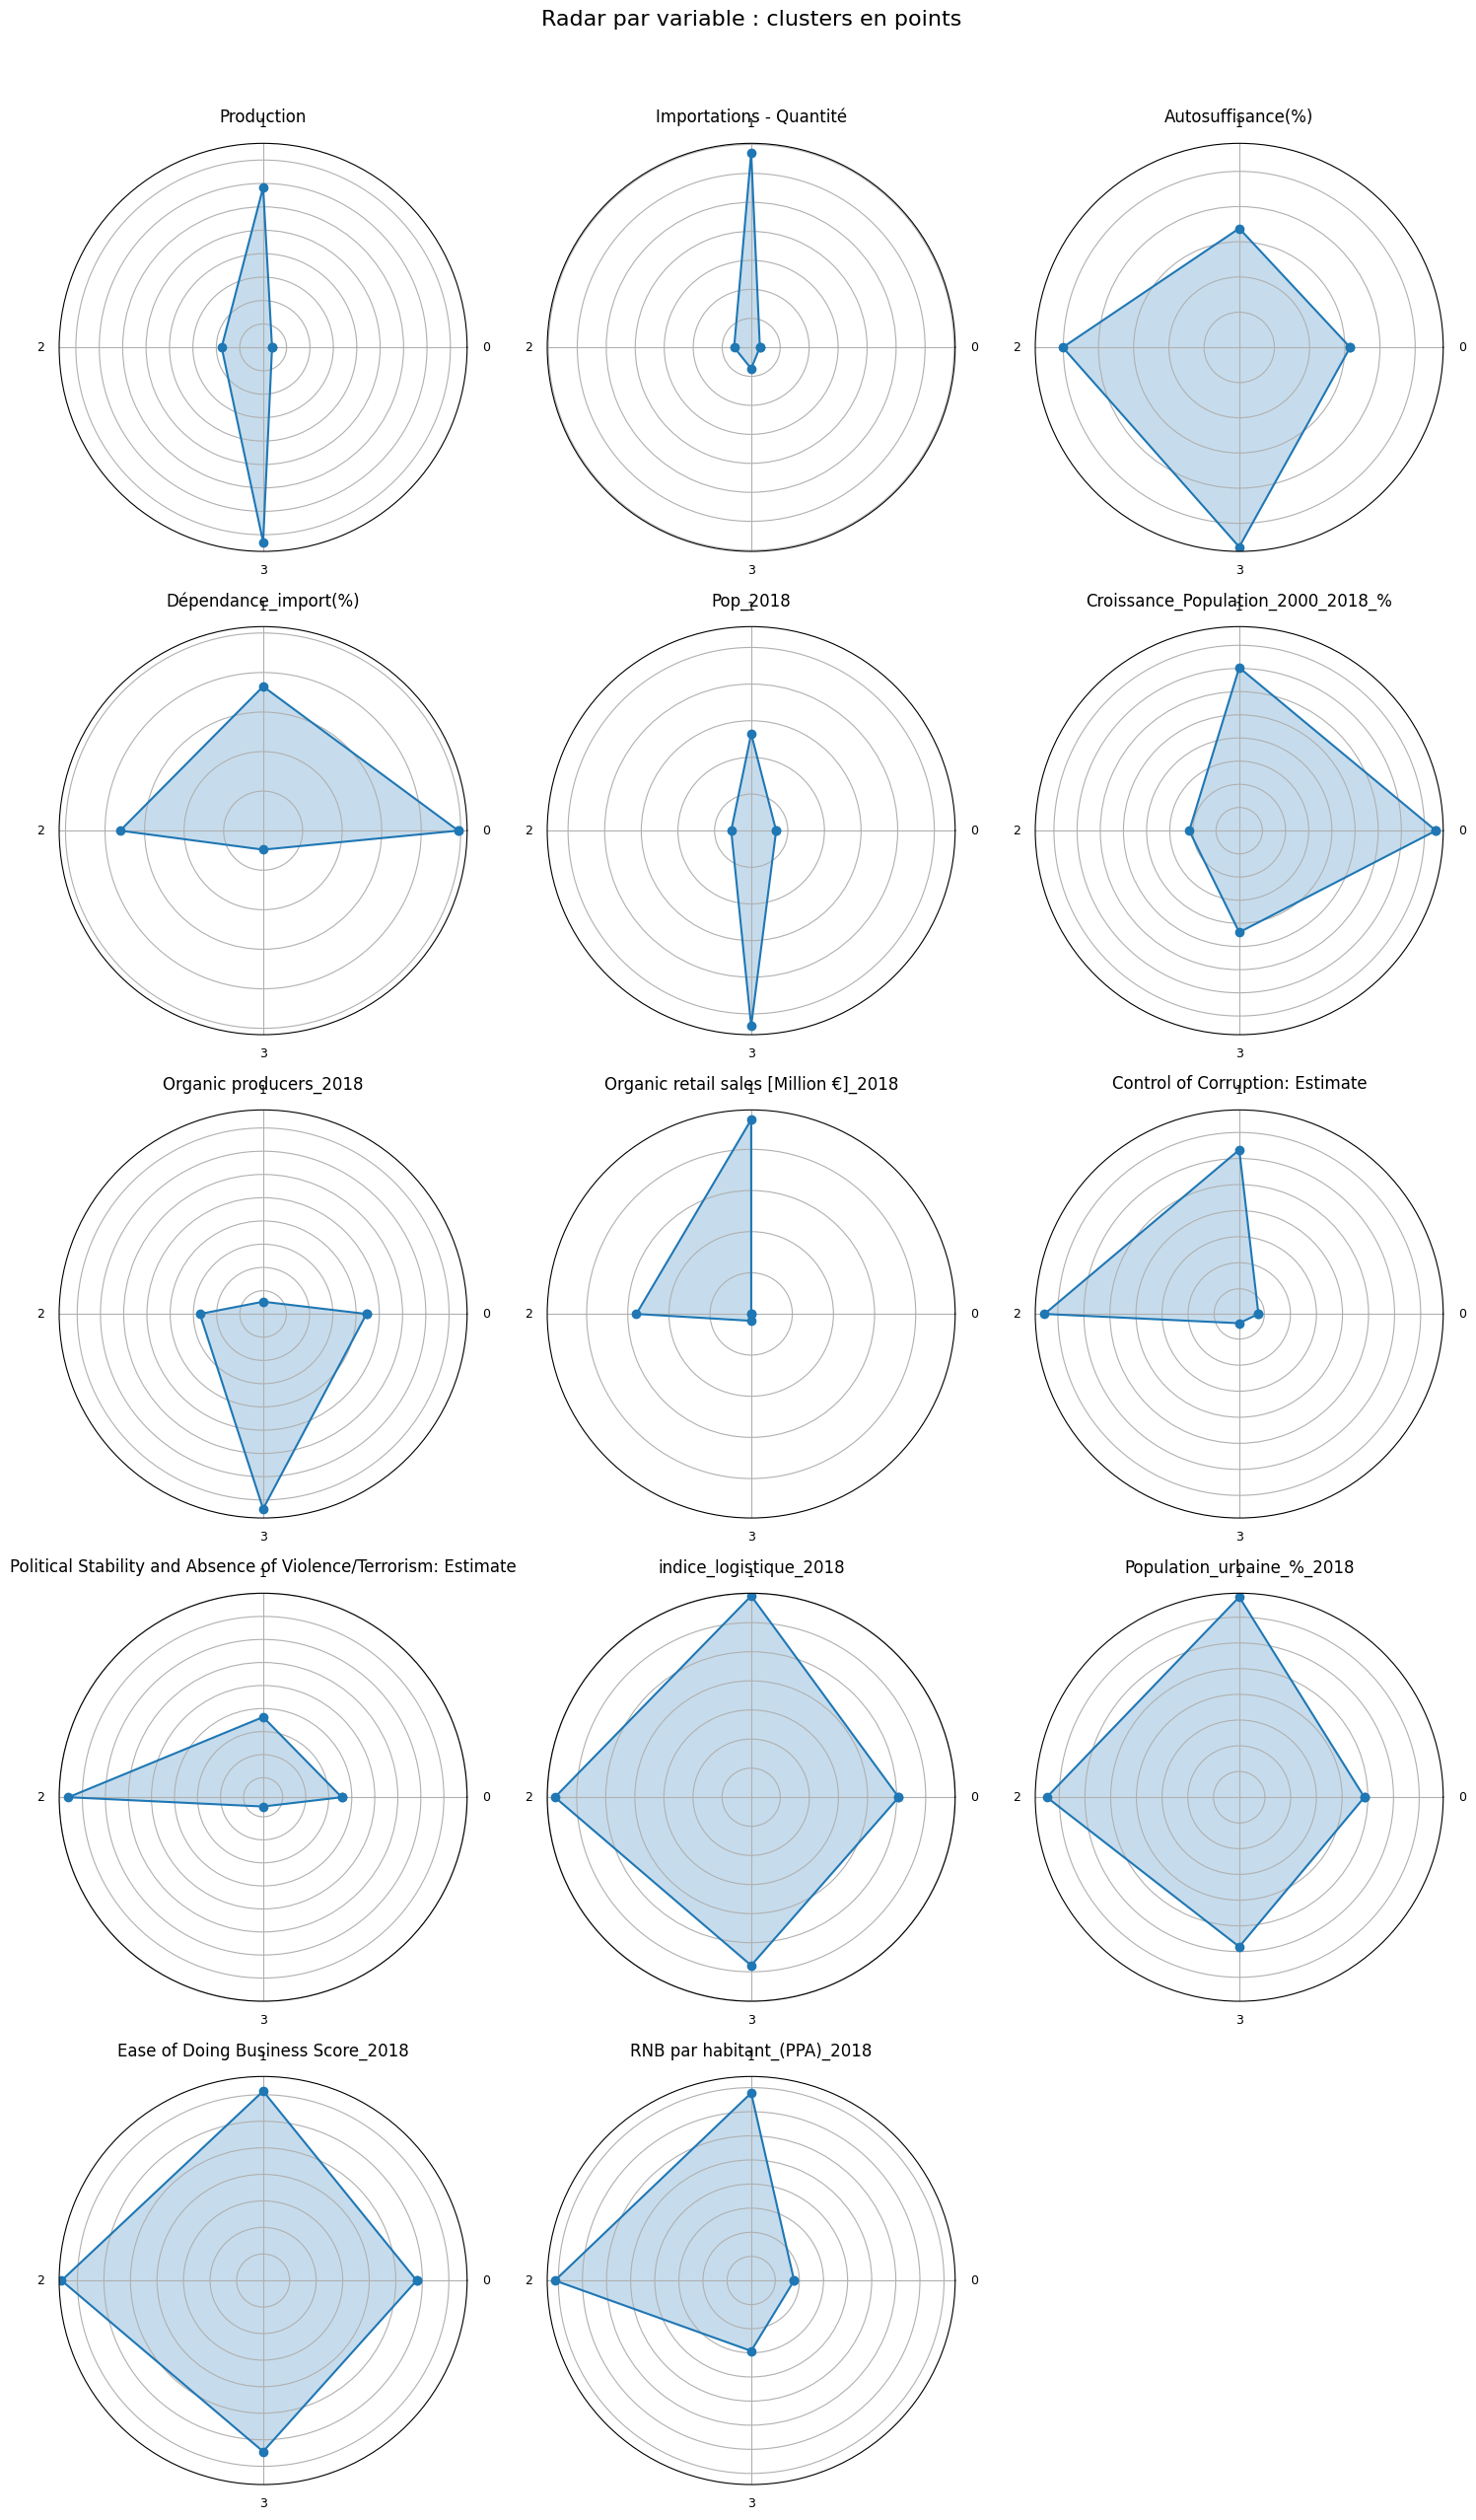

In [43]:
plot_radar_per_variable(means)

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




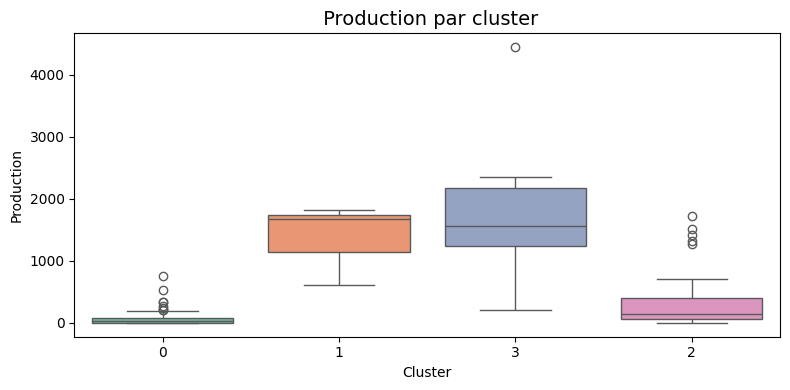

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




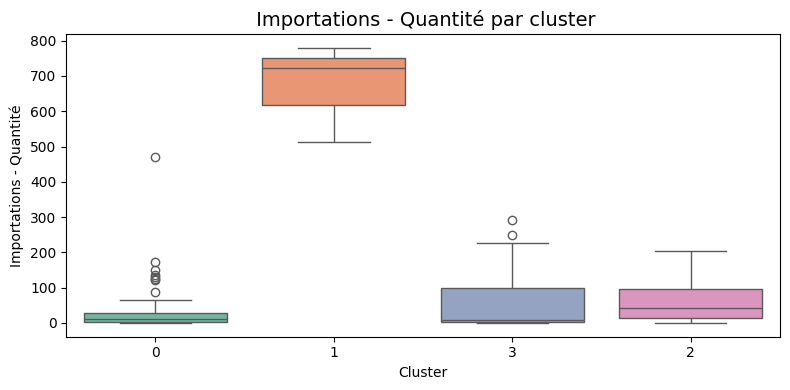

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




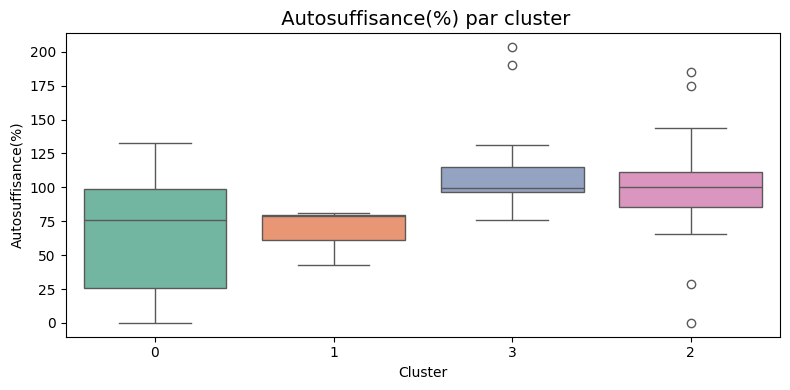

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




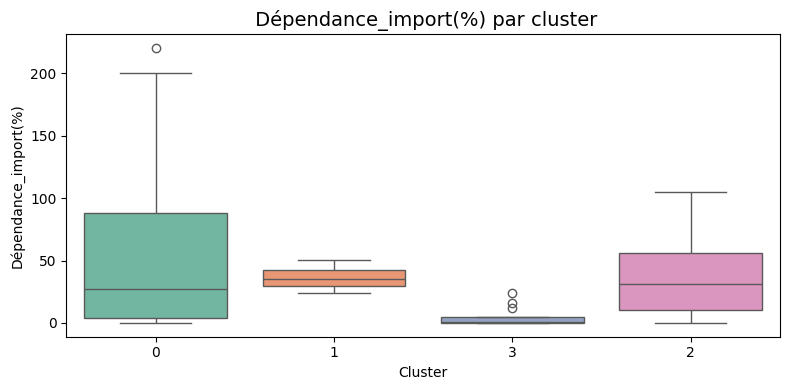

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




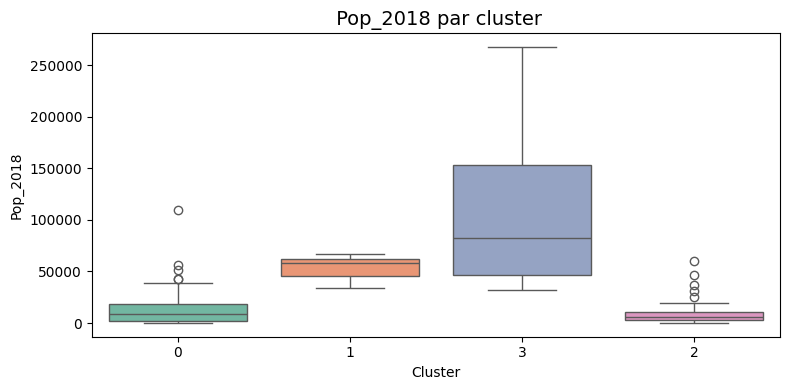

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




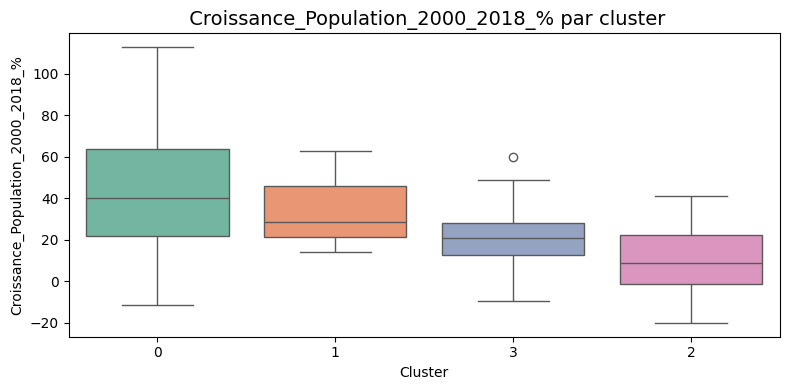

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




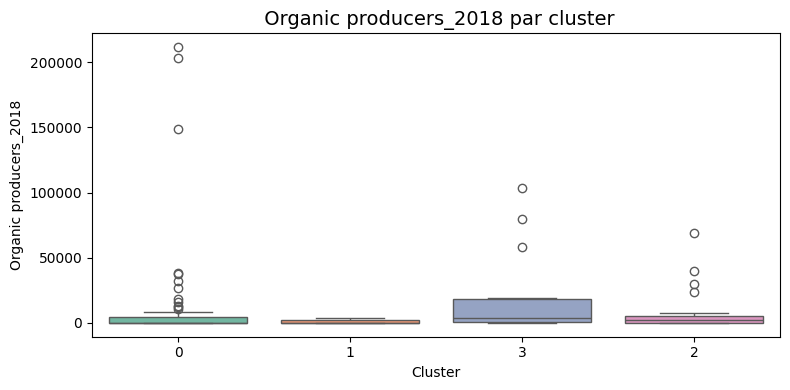

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




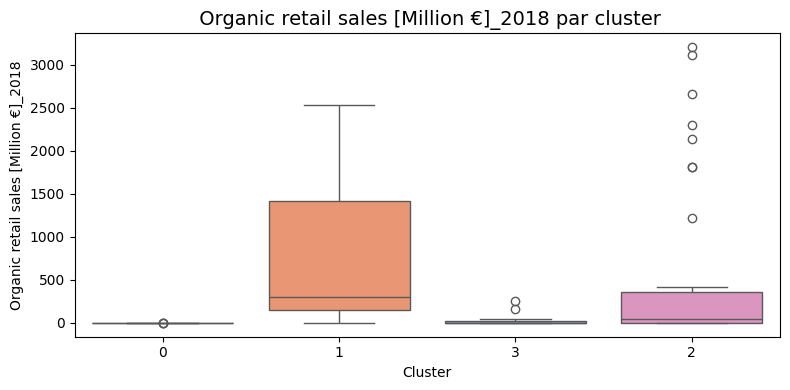

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




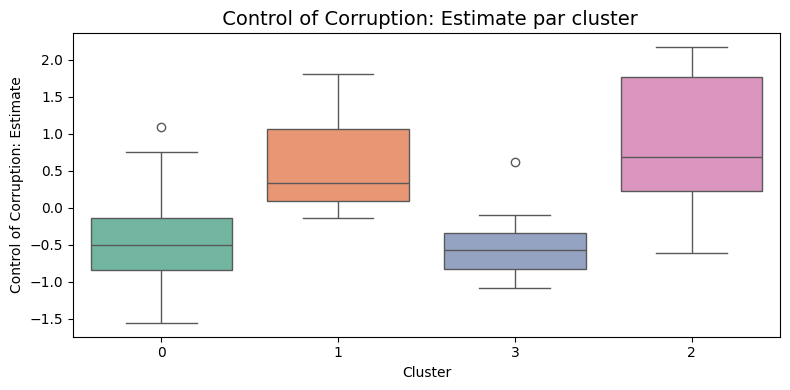

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




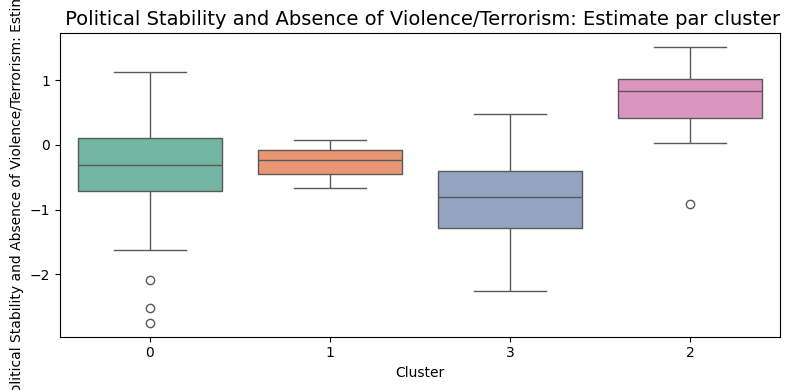

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




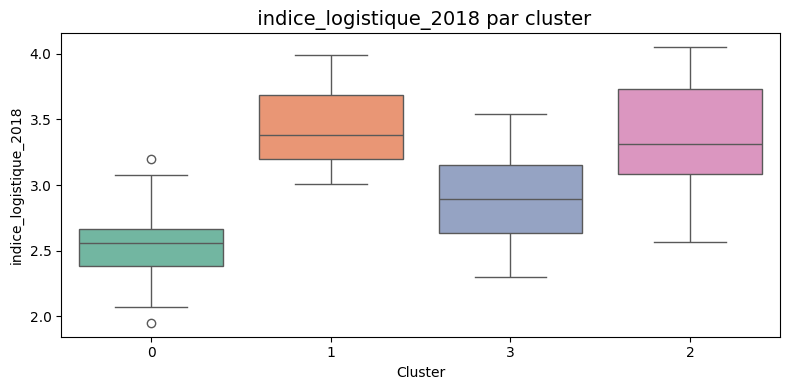

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




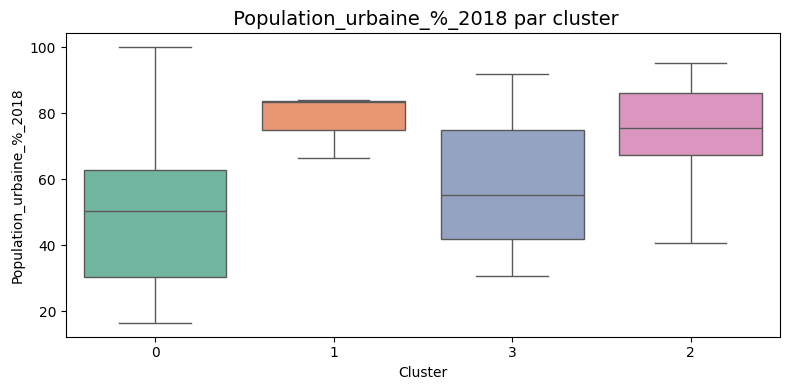

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




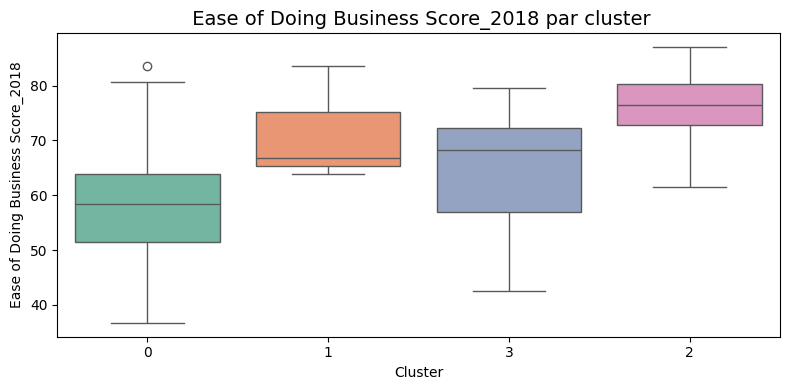

/tmp/ipython-input-44-3225854074.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




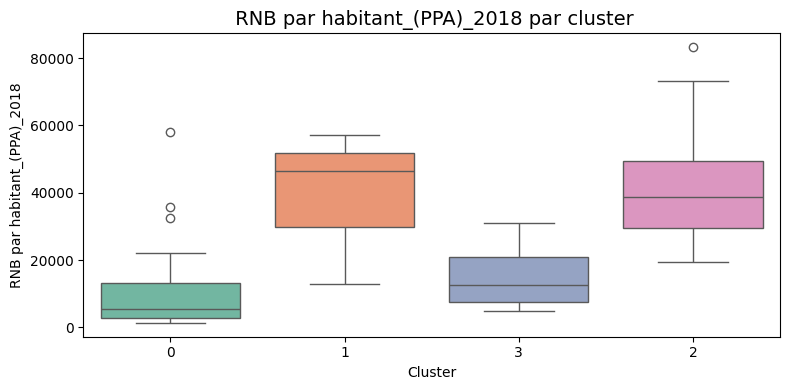

In [44]:
def plot_all_boxplots(df, cluster_col, features):
    for var in features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cluster_col, y=var, data=df, palette="Set2")
        plt.title(f' {var} par cluster', fontsize=14)
        plt.xlabel('Cluster')
        plt.ylabel(var)
        plt.tight_layout()
        plt.show()

plot_all_boxplots(datas_clusters_analysis,"cluster_kmeans",features)